### Reading in Data, Basic Queries

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("gdp.csv")

In [ ]:
df

In [ ]:
df["gdp"] = df["GDP (constant 2010 US$)"] / 1_000_000_000

In [ ]:
df

In [ ]:
# See the GDP of only China
df[df["Entity"] == "China"]

In [ ]:
# GDP of China in 2017 using &
df[(df["Entity"] == "China") & (df["Year"] == 2017)]

In [ ]:
# GDP of China in 2017 using query 
df.query('Entity == "China" and Year == 2017')

In [ ]:
# Seeing GDP only from a list of countries using isin
list_of_countries = ["China", "United States", "India", 
                     "Japan", "Germany", "United Kingdom"]
top6 = df[df["Entity"].isin(list_of_countries)]

In [ ]:
top6 = df.query("Entity in @list_of_countries and Year == 2017")

### Introducing Our Visualization Libraries

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
top6.plot(x = "Entity", y = "gdp", kind = "bar")

In [ ]:
import seaborn as sns
sns.barplot(data = top6, x = "Entity", y = "gdp")

In [ ]:
sns.barplot(data = top6, x = "Entity", y = "gdp")
plt.xticks(rotation = 45)

In [ ]:
import seaborn as sns
sns.barplot(data = top6, x = "Entity", y = "gdp")
plt.xticks(rotation=45)

In [ ]:
import plotly.express as px

fig = px.bar(top6, x = "Entity", y = "gdp", color = "Entity",
            color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [ ]:
list_of_countries = ["China", "United States", "India", 
                     "Japan", "Germany", "United Kingdom"]
top6_over_time = df[df["Entity"].isin(list_of_countries)]

In [ ]:
list_of_countries = ["China", "United States", "India", 
                     "Japan", "Germany", "United Kingdom"]
top6_over_time = df[df["Entity"].isin(list_of_countries)]
fig = px.line(top6_over_time, x = "Year", y = "gdp", color = "Entity", 
            title = "Top 6 Country GDP (in billions)", 
            color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(font_size = 16)

fig.show()

### Groupby Operations

In [115]:
# What was the total GDP of the world in each year?

In [124]:
df.query("Year == 1960")

,Entity,Code,Year,GDP (constant 2010 US$),gdp
54,Algeria,DZA,1960,2.743440e+10,27.434399
254,Argentina,ARG,1960,1.155739e+11,115.573869
341,Australia,AUS,1960,1.992333e+11,199.233335
399,Austria,AUT,1960,9.183670e+10,91.836703
485,Bahamas,BHS,1960,1.942538e+09,1.942538
...,...,...,...,...,...
8437,United States,USA,1960,3.078071e+12,3078.071080
8509,Uruguay,URY,1960,1.389815e+10,13.898153
8637,Venezuela,VEN,1960,1.014246e+11,101.424598
8753,Zambia,ZMB,1960,4.592976e+09,4.592976


In [122]:
df.groupby("Year").agg(sum)

,GDP (constant 2010 US$),gdp
Year,,
1960,9.025835e+12,9025.834854
1961,9.434022e+12,9434.021757
1962,9.959005e+12,9959.004555
1963,1.047782e+13,10477.823331
1964,1.117623e+13,11176.230223
...,...,...
2013,7.095199e+13,70951.987117
2014,7.296737e+13,72967.372451
2015,7.462795e+13,74627.950281


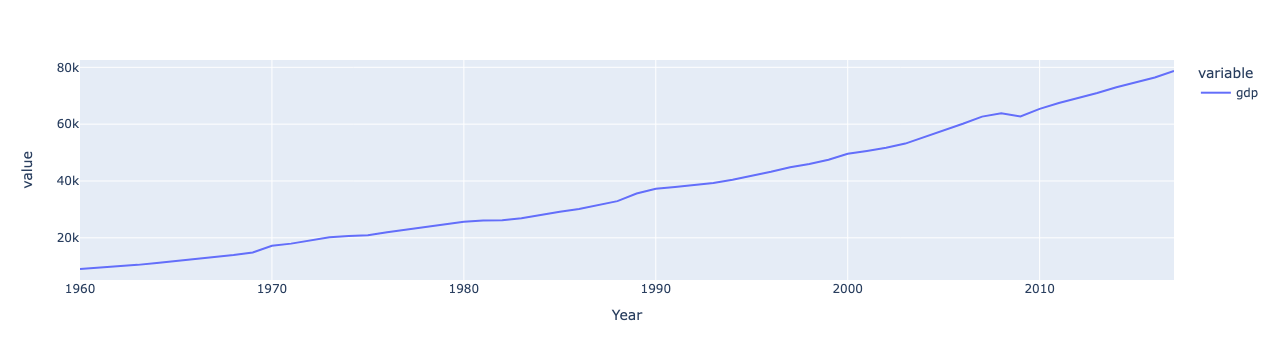

In [126]:
px.line(df.groupby("Year")["gdp"].agg(sum))

In [ ]:
# What was the largest GDP of any country in each year?

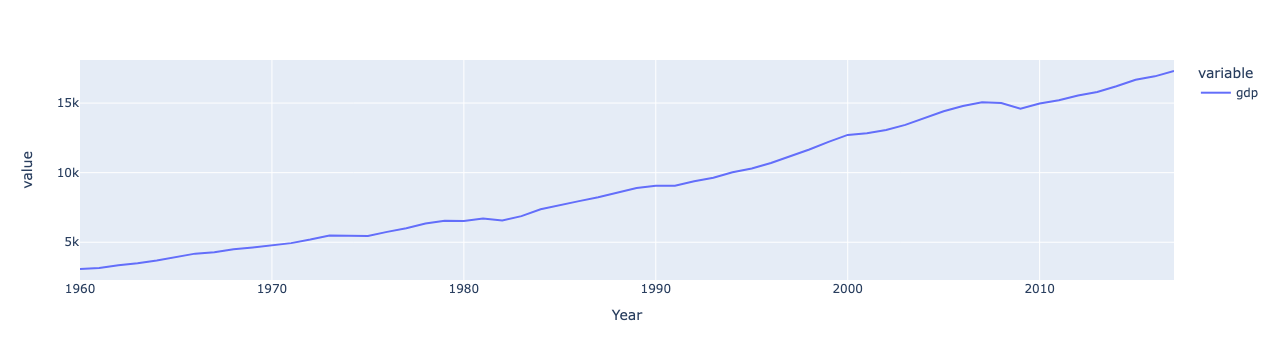

In [131]:
px.line(df.groupby("Year")[["gdp"]].agg(max))

In [ ]:
# What was the smallest GDP of any country in each year?

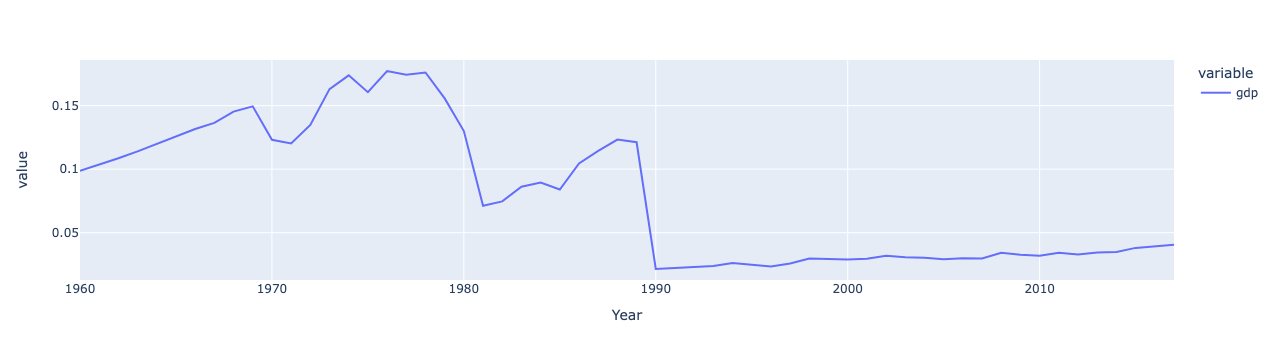

In [132]:
px.line(df.groupby("Year")[["gdp"]].agg(min))

In [ ]:
# What was the ratio of the largest to smallest GDP in each year?

In [136]:
largest_gdps = df.groupby("Year")[["gdp"]].agg(max)
smallest_gdps = df.groupby("Year")[["gdp"]].agg(min)

In [137]:
ratio_of_largest_to_smallest = largest_gdps / smallest_gdps

In [138]:
ratio_of_largest_to_smallest

,gdp
Year,
1960,31174.904577
1961,30404.457057
1962,30754.422037
1963,30591.375224
1964,30824.487623
...,...
2013,459267.263374
2014,464801.557315
2015,438051.587561


In [139]:
def ratio_of_largest_to_smallest(s):
    largest = max(s)
    smallest = min(s)
    return largest / smallest

In [140]:
 df.groupby("Year")[["gdp"]].agg(ratio_of_largest_to_smallest)

,gdp
Year,
1960,31174.904577
1961,30404.457057
1962,30754.422037
1963,30591.375224
1964,30824.487623
...,...
2013,459267.263374
2014,464801.557315
2015,438051.587561


In [335]:
df.groupby("Entity").agg(ratio_of_largest_to_smallest)

,Year,GDP (constant 2010 US$),gdp
Entity,,,
Afghanistan,1.007493,2.741642,2.741642
Albania,1.018687,3.344123,3.344123
Algeria,1.029082,10.473116,10.473116
American Samoa,1.006993,1.181962,1.181962
Andorra,1.023858,3.937261,3.937261
...,...,...,...
Venezuela,1.027551,4.323108,4.323108
Vietnam,1.016633,7.802018,7.802018
Yemen,1.013065,2.635640,2.635640


In [176]:
# What was the smallest economy in each year?

In [178]:
df.groupby("Year").agg(min)

,Entity,Code,GDP (constant 2010 US$),gdp
Year,,,,
1960,Algeria,ARG,9.873554e+07,0.098736
1961,Algeria,ARG,1.035660e+08,0.103566
1962,Algeria,ARG,1.086331e+08,0.108633
1963,Algeria,ARG,1.140174e+08,0.114017
1964,Algeria,ARG,1.197181e+08,0.119718
...,...,...,...,...
2013,Afghanistan,AFG,3.440884e+07,0.034409
2014,Afghanistan,AFG,3.487265e+07,0.034873
2015,Afghanistan,AFG,3.806102e+07,0.038061


In [179]:
df.sort_values("gdp")

,Entity,Code,Year,GDP (constant 2010 US$),gdp
8241,Tuvalu,TUV,1990,2.144197e+07,0.021442
8242,Tuvalu,TUV,1991,2.221584e+07,0.022216
8243,Tuvalu,TUV,1992,2.283541e+07,0.022835
8247,Tuvalu,TUV,1996,2.342202e+07,0.023422
8244,Tuvalu,TUV,1993,2.377411e+07,0.023774
...,...,...,...,...,...
8490,United States,USA,2013,1.580286e+13,15802.855301
8491,United States,USA,2014,1.620886e+13,16208.861247
8492,United States,USA,2015,1.667269e+13,16672.691918
8493,United States,USA,2016,1.692033e+13,16920.327942


In [182]:
def get_first_item(s):
    return s.iloc[0]

In [183]:
df.sort_values("gdp").groupby("Year").agg(get_first_item)

,Entity,Code,GDP (constant 2010 US$),gdp
Year,,,,
1960,Belize,BLZ,9.873554e+07,0.098736
1961,Belize,BLZ,1.035660e+08,0.103566
1962,Belize,BLZ,1.086331e+08,0.108633
1963,Belize,BLZ,1.140174e+08,0.114017
1964,Belize,BLZ,1.197181e+08,0.119718
...,...,...,...,...
2013,Tuvalu,TUV,3.440884e+07,0.034409
2014,Tuvalu,TUV,3.487265e+07,0.034873
2015,Tuvalu,TUV,3.806102e+07,0.038061


In [187]:
df.sort_values("gdp").groupby("Year").first()

,Entity,Code,GDP (constant 2010 US$),gdp
Year,,,,
1960,Belize,BLZ,9.873554e+07,0.098736
1961,Belize,BLZ,1.035660e+08,0.103566
1962,Belize,BLZ,1.086331e+08,0.108633
1963,Belize,BLZ,1.140174e+08,0.114017
1964,Belize,BLZ,1.197181e+08,0.119718
...,...,...,...,...
2013,Tuvalu,TUV,3.440884e+07,0.034409
2014,Tuvalu,TUV,3.487265e+07,0.034873
2015,Tuvalu,TUV,3.806102e+07,0.038061


In [188]:
df[df["Entity"] == "Tuvalu"]

,Entity,Code,Year,GDP (constant 2010 US$),gdp
8241,Tuvalu,TUV,1990,2.144197e+07,0.021442
8242,Tuvalu,TUV,1991,2.221584e+07,0.022216
8243,Tuvalu,TUV,1992,2.283541e+07,0.022835
8244,Tuvalu,TUV,1993,2.377411e+07,0.023774
8245,Tuvalu,TUV,1994,2.621891e+07,0.026219
...,...,...,...,...,...
8264,Tuvalu,TUV,2013,3.440884e+07,0.034409
8265,Tuvalu,TUV,2014,3.487265e+07,0.034873
8266,Tuvalu,TUV,2015,3.806102e+07,0.038061
8267,Tuvalu,TUV,2016,3.921616e+07,0.039216


In [108]:
# What fraction of world GDP did each country generate each year?

In [197]:
df

,Entity,Code,Year,GDP (constant 2010 US$),gdp
0,Afghanistan,AFG,2002,8.013233e+09,8.013233
1,Afghanistan,AFG,2003,8.689884e+09,8.689884
2,Afghanistan,AFG,2004,8.781610e+09,8.781610
3,Afghanistan,AFG,2005,9.762979e+09,9.762979
4,Afghanistan,AFG,2006,1.030523e+10,10.305228
...,...,...,...,...,...
8864,Zimbabwe,ZWE,2013,1.418193e+10,14.181927
8865,Zimbabwe,ZWE,2014,1.448359e+10,14.483588
8866,Zimbabwe,ZWE,2015,1.472830e+10,14.728302
8867,Zimbabwe,ZWE,2016,1.481899e+10,14.818986


In [198]:
total_gdp

,GDP (constant 2010 US$),gdp
Year,,
1960,9.025835e+12,9025.834854
1961,9.434022e+12,9434.021757
1962,9.959005e+12,9959.004555
1963,1.047782e+13,10477.823331
1964,1.117623e+13,11176.230223
...,...,...
2013,7.095199e+13,70951.987117
2014,7.296737e+13,72967.372451
2015,7.462795e+13,74627.950281


In [206]:
chinese_gdp_indexed_by_year = df.query('Entity == "China"').set_index("Year")

In [210]:
chinese_gdp_indexed_by_year

,Entity,Code,GDP (constant 2010 US$),gdp
Year,,,,
1960,China,CHN,1.279381e+11,127.938142
1961,China,CHN,9.304941e+10,93.049411
1962,China,CHN,8.785725e+10,87.857254
1963,China,CHN,9.690655e+10,96.906551
1964,China,CHN,1.145242e+11,114.524162
...,...,...,...,...
2013,China,CHN,7.766513e+12,7766.512756
2014,China,CHN,8.333287e+12,8333.286913
2015,China,CHN,8.908301e+12,8908.300778


In [208]:
chinese_gdp_indexed_by_year / total_gdp

,Code,Entity,GDP (constant 2010 US$),gdp
Year,,,,
1960,NaN,NaN,0.014175,0.014175
1961,NaN,NaN,0.009863,0.009863
1962,NaN,NaN,0.008822,0.008822
1963,NaN,NaN,0.009249,0.009249
1964,NaN,NaN,0.010247,0.010247
...,...,...,...,...
2013,NaN,NaN,0.109462,0.109462
2014,NaN,NaN,0.114206,0.114206
2015,NaN,NaN,0.119369,0.119369


In [209]:
px.line( (chinese_gdp_indexed_by_year / total_gdp)["gdp"])

In [213]:
df.set_index("Year") 

,Entity,Code,GDP (constant 2010 US$),gdp
Year,,,,
2002,Afghanistan,AFG,8.013233e+09,8.013233
2003,Afghanistan,AFG,8.689884e+09,8.689884
2004,Afghanistan,AFG,8.781610e+09,8.781610
2005,Afghanistan,AFG,9.762979e+09,9.762979
2006,Afghanistan,AFG,1.030523e+10,10.305228
...,...,...,...,...
2013,Zimbabwe,ZWE,1.418193e+10,14.181927
2014,Zimbabwe,ZWE,1.448359e+10,14.483588
2015,Zimbabwe,ZWE,1.472830e+10,14.728302


In [212]:
df.set_index("Year") / total_gdp

,Code,Entity,GDP (constant 2010 US$),gdp
Year,,,,
1960,NaN,NaN,0.003040,0.003040
1960,NaN,NaN,0.012805,0.012805
1960,NaN,NaN,0.022074,0.022074
1960,NaN,NaN,0.010175,0.010175
1960,NaN,NaN,0.000215,0.000215
...,...,...,...,...
2017,NaN,NaN,0.000836,0.000836
2017,NaN,NaN,0.000010,0.000010
2017,NaN,NaN,0.002227,0.002227


In [215]:
df_indexed_by_year_and_entity = df.set_index(["Year", "Entity"]) 
df_indexed_by_year_and_entity

,,Code,GDP (constant 2010 US$),gdp
Year,Entity,,,
2002,Afghanistan,AFG,8.013233e+09,8.013233
2003,Afghanistan,AFG,8.689884e+09,8.689884
2004,Afghanistan,AFG,8.781610e+09,8.781610
2005,Afghanistan,AFG,9.762979e+09,9.762979
2006,Afghanistan,AFG,1.030523e+10,10.305228
...,...,...,...,...
2013,Zimbabwe,ZWE,1.418193e+10,14.181927
2014,Zimbabwe,ZWE,1.448359e+10,14.483588
2015,Zimbabwe,ZWE,1.472830e+10,14.728302


In [219]:
share_of_world_economy_by_year_and_entity = (df_indexed_by_year_and_entity / total_gdp)[["gdp"]]
share_of_world_economy_by_year_and_entity

,,gdp
Year,Entity,
2002,Afghanistan,0.000155
2003,Afghanistan,0.000163
2004,Afghanistan,0.000158
2005,Afghanistan,0.000169
2006,Afghanistan,0.000171
...,...,...
2013,Zimbabwe,0.000200
2014,Zimbabwe,0.000198
2015,Zimbabwe,0.000197


In [220]:
share_of_world_economy = share_of_world_economy_by_year_and_entity.reset_index()
share_of_world_economy

,Year,Entity,gdp
0,2002,Afghanistan,0.000155
1,2003,Afghanistan,0.000163
2,2004,Afghanistan,0.000158
3,2005,Afghanistan,0.000169
4,2006,Afghanistan,0.000171
...,...,...,...
8864,2013,Zimbabwe,0.000200
8865,2014,Zimbabwe,0.000198
8866,2015,Zimbabwe,0.000197
8867,2016,Zimbabwe,0.000194


In [223]:
top6_share = share_of_world_economy[share_of_world_economy["Entity"].isin(list_of_countries)]
top6_share

,Year,Entity,gdp
1726,1960,China,0.014175
1727,1961,China,0.009863
1728,1962,China,0.008822
1729,1963,China,0.009249
1730,1964,China,0.010247
...,...,...,...
8490,2013,United States,0.222726
8491,2014,United States,0.222138
8492,2015,United States,0.223411
8493,2016,United States,0.221420


In [226]:
px.line(top6_share, x = "Year", y = "gdp", color = "Entity")

In [109]:
# By what factor has each country’s GDP grown since 1960?

In [277]:
top6_all_time = df.query("Entity in @list_of_countries")
top6_all_time

,Entity,Code,Year,GDP (constant 2010 US$),gdp
1726,China,CHN,1960,1.279381e+11,127.938142
1727,China,CHN,1961,9.304941e+10,93.049411
1728,China,CHN,1962,8.785725e+10,87.857254
1729,China,CHN,1963,9.690655e+10,96.906551
1730,China,CHN,1964,1.145242e+11,114.524162
...,...,...,...,...,...
8490,United States,USA,2013,1.580286e+13,15802.855301
8491,United States,USA,2014,1.620886e+13,16208.861247
8492,United States,USA,2015,1.667269e+13,16672.691918
8493,United States,USA,2016,1.692033e+13,16920.327942


In [278]:
top6_by_entity_and_year = top6_all_time.set_index(["Entity", "Year"])
top6_by_entity_and_year

Code  GDP (constant 2010 US$)           gdp
Entity        Year                                            
China         1960  CHN             1.279381e+11    127.938142
              1961  CHN             9.304941e+10     93.049411
              1962  CHN             8.785725e+10     87.857254
              1963  CHN             9.690655e+10     96.906551
              1964  CHN             1.145242e+11    114.524162
...                 ...                      ...           ...
United States 2013  USA             1.580286e+13  15802.855301
              2014  USA             1.620886e+13  16208.861247
              2015  USA             1.667269e+13  16672.691918
              2016  USA             1.692033e+13  16920.327942
              2017  USA             1.730498e+13  17304.984279

[338 rows x 3 columns]

In [279]:
top6_all_time.groupby("Entity").first()

,Code,Year,GDP (constant 2010 US$),gdp
Entity,,,,
China,CHN,1960,1.279381e+11,127.938142
Germany,DEU,1970,1.534053e+12,1534.052735
India,IND,1960,1.367463e+11,136.746336
Japan,JPN,1960,7.962132e+11,796.213204
United Kingdom,GBR,1960,7.245584e+11,724.558361
United States,USA,1960,3.078071e+12,3078.071080


In [284]:
gdp1960_values_by_entity = top6_all_time.query("Year == 1960").set_index(["Entity"])
gdp1960_values_by_entity

,Code,Year,GDP (constant 2010 US$),gdp
Entity,,,,
China,CHN,1960,1.279381e+11,127.938142
India,IND,1960,1.367463e+11,136.746336
Japan,JPN,1960,7.962132e+11,796.213204
United Kingdom,GBR,1960,7.245584e+11,724.558361
United States,USA,1960,3.078071e+12,3078.071080


In [288]:
top6_by_entity_and_year["gdp_ratio"] = top6_by_entity_and_year["gdp"] / gdp1960_values_by_entity["gdp"]
top6_by_entity_and_year

Code  GDP (constant 2010 US$)           gdp  gdp_ratio
Entity        Year                                                       
China         1960  CHN             1.279381e+11    127.938142   1.000000
              1961  CHN             9.304941e+10     93.049411   0.727300
              1962  CHN             8.785725e+10     87.857254   0.686717
              1963  CHN             9.690655e+10     96.906551   0.757448
              1964  CHN             1.145242e+11    114.524162   0.895153
...                 ...                      ...           ...        ...
United States 2013  USA             1.580286e+13  15802.855301   5.134012
              2014  USA             1.620886e+13  16208.861247   5.265915
              2015  USA             1.667269e+13  16672.691918   5.416604
              2016  USA             1.692033e+13  16920.327942   5.497056
              2017  USA             1.730498e+13  17304.984279   5.622022

[338 rows x 4 columns]

In [294]:
top6_including_gdp_ratio = top6_by_entity_and_year.reset_index()

In [296]:
px.line(top6_including_gdp_ratio, x = "Year", y = "gdp_ratio", color = "Entity")

In [313]:
# Plot only the countries with large gdp growth since 1960

In [314]:
df_by_entity_and_year = df.set_index(["Entity", "Year"])
gdp1960_values_by_entity = df.query("Year == 1960").set_index(["Entity"])
df_by_entity_and_year["gdp_ratio"] = df_by_entity_and_year["gdp"] / gdp1960_values_by_entity["gdp"]
df_with_gdp_ratio = df_by_entity_and_year.reset_index()
df_with_gdp_ratio

,Entity,Year,Code,GDP (constant 2010 US$),gdp,gdp_ratio
0,Afghanistan,2002,AFG,8.013233e+09,8.013233,NaN
1,Afghanistan,2003,AFG,8.689884e+09,8.689884,NaN
2,Afghanistan,2004,AFG,8.781610e+09,8.781610,NaN
3,Afghanistan,2005,AFG,9.762979e+09,9.762979,NaN
4,Afghanistan,2006,AFG,1.030523e+10,10.305228,NaN
...,...,...,...,...,...,...
8864,Zimbabwe,2013,ZWE,1.418193e+10,14.181927,4.216605
8865,Zimbabwe,2014,ZWE,1.448359e+10,14.483588,4.306296
8866,Zimbabwe,2015,ZWE,1.472830e+10,14.728302,4.379055
8867,Zimbabwe,2016,ZWE,1.481899e+10,14.818986,4.406017


In [315]:
df_with_gdp_ratio = df_with_gdp_ratio.dropna()
df_with_gdp_ratio

,Entity,Year,Code,GDP (constant 2010 US$),gdp,gdp_ratio
54,Algeria,1960,DZA,2.743440e+10,27.434399,1.000000
55,Algeria,1961,DZA,2.370183e+10,23.701828,0.863946
56,Algeria,1962,DZA,1.903611e+10,19.036113,0.693878
57,Algeria,1963,DZA,2.556811e+10,25.568114,0.931973
58,Algeria,1964,DZA,2.706114e+10,27.061141,0.986395
...,...,...,...,...,...,...
8864,Zimbabwe,2013,ZWE,1.418193e+10,14.181927,4.216605
8865,Zimbabwe,2014,ZWE,1.448359e+10,14.483588,4.306296
8866,Zimbabwe,2015,ZWE,1.472830e+10,14.728302,4.379055
8867,Zimbabwe,2016,ZWE,1.481899e+10,14.818986,4.406017


In [317]:
px.line(df_with_gdp_ratio, x = "Year", y = "gdp_ratio", color = "Entity")

In [318]:
df_with_gdp_ratio.query("Year == 2017 and gdp_ratio > 10")

,Entity,Year,Code,GDP (constant 2010 US$),gdp,gdp_ratio
638,Bangladesh,2017,BGD,1.799922e+11,179.992152,10.076512
826,Belize,2017,BLZ,1.616833e+09,1.616833,16.375388
1116,Botswana,2017,BWA,1.724066e+10,17.240661,84.096474
1314,Burkina Faso,2017,BFA,1.321529e+10,13.215294,11.456717
1783,China,2017,CHN,1.016101e+13,10161.012759,79.421294
...,...,...,...,...,...,...
7185,Seychelles,2017,SYC,1.341523e+09,1.341523,11.369219
7301,Singapore,2017,SGP,3.099957e+11,309.995673,55.549158
7494,South Korea,2017,KOR,1.345946e+12,1345.945672,56.985728
7927,Thailand,2017,THA,4.229004e+11,422.900352,27.039889


In [324]:
def max_gdp_ratio_gt_10(s):
    max_gdp_ratio = max(s["gdp_ratio"])
    return max_gdp_ratio > 10

In [328]:
ratio_greater_than_10 = df_with_gdp_ratio.groupby("Entity").filter(max_value_greater_than_10)
ratio_greater_than_10

,Entity,Year,Code,GDP (constant 2010 US$),gdp,gdp_ratio
581,Bangladesh,1960,BGD,1.786255e+10,17.862545,1.000000
582,Bangladesh,1961,BGD,1.894469e+10,18.944687,1.060582
583,Bangladesh,1962,BGD,1.997775e+10,19.977747,1.118415
584,Bangladesh,1963,BGD,1.988667e+10,19.886669,1.113317
585,Bangladesh,1964,BGD,2.206481e+10,22.064814,1.235256
...,...,...,...,...,...,...
8205,Turkey,2013,TUR,9.750871e+11,975.087052,11.178871
8206,Turkey,2014,TUR,1.025467e+12,1025.466785,11.756449
8207,Turkey,2015,TUR,1.087876e+12,1087.875531,12.471933
8208,Turkey,2016,TUR,1.122512e+12,1122.511655,12.869019


In [330]:
px.line(ratio_greater_than_10, y = "gdp_ratio", x = "Year", color = "Entity")

In [332]:
ec = ["China", "India", "United States"]
ey = [1960, 1990, 2017]
df_with_gdp_ratio.query("Entity in @ec and Year in @ey")

,Entity,Year,Code,GDP (constant 2010 US$),gdp,gdp_ratio
1726,China,1960,CHN,1.279381e+11,127.938142,1.000000
1756,China,1990,CHN,8.295620e+11,829.561968,6.484086
1783,China,2017,CHN,1.016101e+13,10161.012759,79.421294
3732,India,1960,IND,1.367463e+11,136.746336,1.000000
3762,India,1990,IND,4.665332e+11,466.533191,3.411669
3789,India,2017,IND,2.629542e+12,2629.542212,19.229343
8437,United States,1960,USA,3.078071e+12,3078.071080,1.000000
8467,United States,1990,USA,9.064414e+12,9064.413765,2.944836
8494,United States,2017,USA,1.730498e+13,17304.984279,5.622022
